In [1]:
import sys
import os

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.zoom_heatmap import filter_sumstats, snp_annotations, get_gene_information

In [2]:
# Create interactive widgets for input
input_path = widgets.Text(
    value='/mnt/0A2AAC152AABFBB7/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

input_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name of GWAS summary file:',
    style={'description_width': 'initial'}
)

top_snp = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, input_name, top_snp)

# Function to get the text parameter values
def get_params():
    return input_path.value, input_name.value, top_snp.value

Text(value='/mnt/0A2AAC152AABFBB7/data/gwasResult/', description='Path to project folder:', style=TextStyle(de…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight:'…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")

Parameter 1: /mnt/0A2AAC152AABFBB7/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper


In [4]:
cols_touse = widgets.Textarea(
    value="#CHROM, POS, ID, P",
    description='Columns to use on the Mannhattan plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(cols_touse)

def get_cols():
    return cols_touse.value

Textarea(value='#CHROM, POS, ID, P', description='Columns to use on the Mannhattan plot (comma-separated):', l…

In [5]:
cols = get_cols()

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in cols.split(',')]
)
df_gwas.head(5)

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063


In [6]:
rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID:',
    style={'description_width': 'initial'}
)

display(rsID)

def get_rsID():
    return rsID.value

Text(value='SNP', description='Column name with the rsID:', style=TextStyle(description_width='initial'))

In [7]:
gwas_rsID = get_rsID()

if path_params[2] is not None or path_params[2] != '':
    highlit_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(highlit_path):
        df_high = pd.read_csv(
            highlit_path, sep='\t'
        )
        to_highlight = df_high[gwas_rsID].to_list()
        print(to_highlight[:10])
        del df_high
    else:
        print('Path to file with SNPs to highlight does not exist')
        to_highlight = []
else:
    print('No file with SNPs to highlight')
    to_highlight = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [8]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)
display(SNP_col, CHR_col, POS_col, P_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value

Text(value='ID', description='Column with rsID:', style=TextStyle(description_width='initial'))

Text(value='#CHROM', description='Column with chromosome:', style=TextStyle(description_width='initial'))

Text(value='POS', description='Column with base-pair position:', style=TextStyle(description_width='initial'))

Text(value='P', description='Column with p-values:', style=TextStyle(description_width='initial'))

In [9]:
snp_col, chr_col, pos_col, p_col = get_col_names()

In [10]:
filtered = filter_sumstats(
    data_df       =df_gwas, 
    lead_snp      =to_highlight[0], 
    snp_col       =snp_col, 
    p_col         =p_col, 
    pos_col       =pos_col, 
    chr_col       =chr_col, 
    pval_threshold=5e-6, 
    radius        =10e6
)
filtered.head()

,#CHROM,POS,ID,P,log10p
0,1,204840546,rs11801418,2.044970e-06,5.689313
1,1,204842990,rs869841,2.770490e-06,5.557443
2,1,204843348,rs12563611,3.140220e-06,5.503040
3,1,204843570,rs12407417,2.770490e-06,5.557443
4,1,204843922,rs12217091,9.794050e-07,6.009038


In [33]:
annotated = snp_annotations(
    data_df=filtered, 
    snp_col=snp_col, 
    chr_col=chr_col, 
    pos_col=pos_col
)

annotated['Mbp'] = annotated['POS'] / 1e6
annotated.head()

2024/12/12 14:28:00 Start to annotate variants with nearest gene name(s)...
2024/12/12 14:28:00  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/12 14:28:00  -Using user-provided gtf:/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/12 14:28:05 Finished annotating variants with nearest gene name(s) successfully!


,#CHROM,POS,ID,P,log10p,GENENAME,consequence,Mbp
0,1,204840546,rs11801418,2.044970e-06,5.689313,NFASC,intron_variant,204.840546
1,1,204842990,rs869841,2.770490e-06,5.557443,NFASC,intron_variant,204.842990
2,1,204843348,rs12563611,3.140220e-06,5.503040,NFASC,intron_variant,204.843348
3,1,204843570,rs12407417,2.770490e-06,5.557443,NFASC,intron_variant,204.843570
4,1,204843922,rs12217091,9.794050e-07,6.009038,NFASC,intron_variant,204.843922


In [12]:
annotated['consequence'].value_counts()

consequence
intron_variant                        83
downstream_gene_variant               33
upstream_gene_variant                 12
3_prime_UTR_variant                   12
intergenic_variant                     8
non_coding_transcript_exon_variant     4
5_prime_UTR_variant                    1
synonymous_variant                     1
Name: count, dtype: int64

In [34]:
genes = get_gene_information(
    genes=annotated['GENENAME'].unique().tolist(),
    gtf_path=None,
    build='38'
)
genes['start_esc'] = genes['start']/1e6
genes['end_esc'] = genes['end']/1e6
genes['length_esc'] = genes['end_esc'] - genes['start_esc']
genes['lenght_esc1'] = genes['length_esc']/1e6
genes


,gene,start,end,strand,length,start_esc,end_esc,length_esc,lenght_esc1
0,NFASC,204828652,205022822,+,194171,204.828652,205.022822,0.194170,1.941700e-07
1,SLC45A3,205657851,205680509,-,22659,205.657851,205.680509,0.022658,2.265800e-08
2,LOC105371701,205680370,205690435,+,10066,205.680370,205.690435,0.010065,1.006500e-08
3,NUCKS1,205712822,205750182,-,37361,205.712822,205.750182,0.037360,3.736000e-08
4,RAB29,205767986,205775482,-,7497,205.767986,205.775482,0.007496,7.496000e-09
5,SLC41A1,205789095,205813198,-,24104,205.789095,205.813198,0.024103,2.410300e-08
6,PM20D1,205828025,205850132,-,22108,205.828025,205.850132,0.022107,2.210700e-08


In [51]:
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.patches import FancyArrow

region = (annotated['Mbp'].min()-0.0025, annotated['Mbp'].max()+0.0025)

plt.figure(figsize=(10,10))
ax1= plt.subplot2grid((40,20), (0,0), rowspan=18, colspan=18)
ax2 = plt.subplot2grid((40,20), (18,0), rowspan=5,  colspan=18)
ax3 = plt.subplot2grid((40,20), (23,0), rowspan=18,colspan=18)
ax4 = plt.subplot2grid((40,20), (23,19), rowspan=10, colspan=1)

missense = annotated[annotated['consequence']=='intron_variant']
utr3     = annotated[annotated['consequence']=='3_prime_UTR_variant']
utr5     = annotated[annotated['consequence']=='5_prime_UTR_variant']
upstrm   = annotated[annotated['consequence']=='upstream_gene_variant']

ax1.scatter(annotated['Mbp'], annotated[p_col],s=15,color='grey', label='')
ax1.scatter(missense['Mbp'], missense[p_col], s=30, color='orange', label='Missense variant')
ax1.scatter(utr3['Mbp'], utr3[p_col], s=30, color='blue', label="3'-UTR variant")
ax1.scatter(utr5['Mbp'], utr5[p_col], s=30, color='green', label="5'-UTR variant")
ax1.scatter(upstrm['Mbp'], upstrm[p_col], s=30, color='black', label="Upstream variant")
ax1.set_xlim(region)
ax1.xaxis.set_ticks_position('top')
ax1.legend(loc='best')
ax1.set_title("Million basepairs on BTA{}".format(1), fontsize=12)
ax1.set_ylabel('log10(P)', fontsize=12)

ys = cycle([0.1,0.4,0.7, 1])

for i in genes.index:
    symbol, strand=genes.loc[i,'gene'],genes.loc[i,'strand']
    start,end,length =genes.loc[i,'start_esc'],genes.loc[i, 'end_esc'],genes.loc[i, 'length_esc']
    y = next(ys)
    if strand =='+':
        arrow = FancyArrow(start, y, length, 0, width=0.01, head_width=0.09, head_length=0.01, color='red')
        ax2.add_patch(arrow)
        #ax2.arrow(start,y,length,0,head_length=0.005, head_width=0.075,color='black')
        ax2.text(start+0.5*length,y+0.05, symbol, ha='center', size=9)
    elif strand == '-':
        arrow_neg = FancyArrow(end, y, -length, 0, width=0.01, head_width=0.09, head_length=0.01, color='blue')
        ax2.add_patch(arrow_neg)
        #ax2.arrow(end,y,-length,0,head_length=0.005, head_width=0.075, color='black')
        ax2.text(start+0.5*length,y+0.05,symbol,ha='center', size=9)
ax2.axis('off')

(0.0, 1.0, 0.0, 1.0)

ValueError: Image size of 143526x859 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 4 Axes>

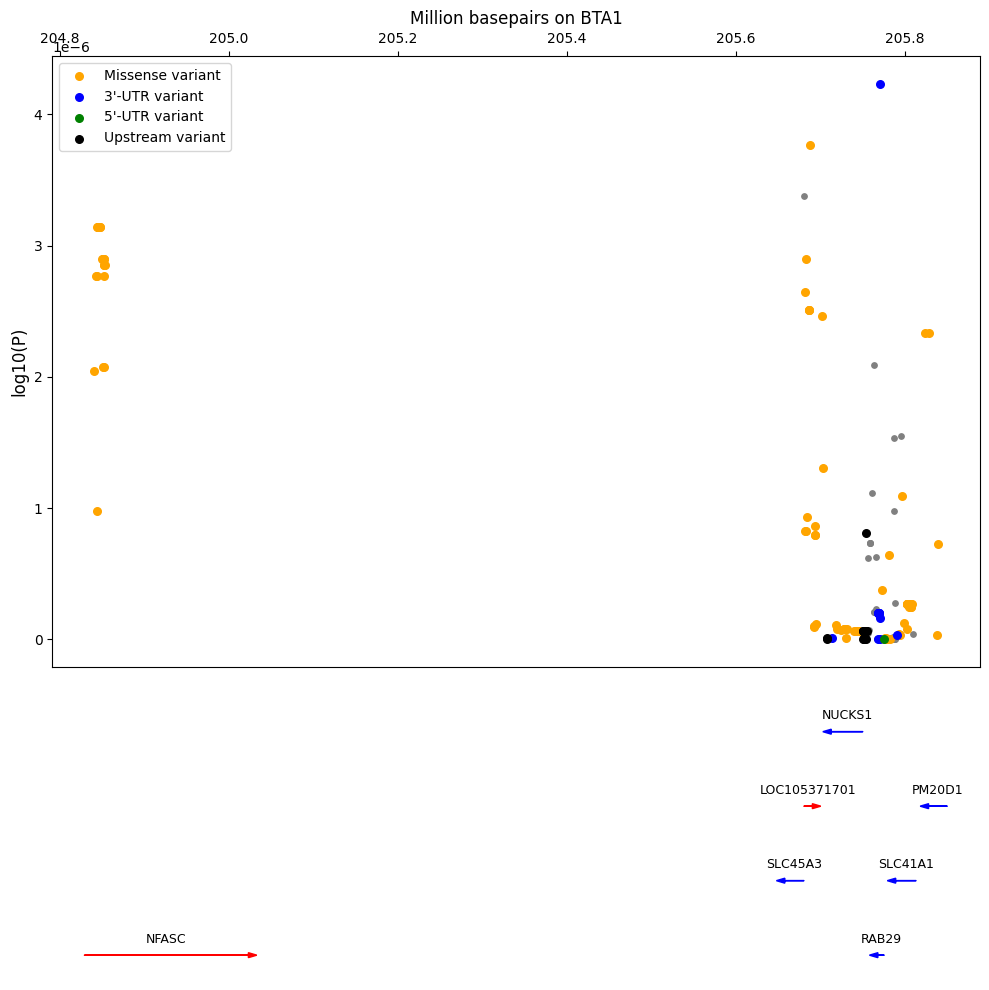

In [74]:
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.patches import FancyArrow

region = (annotated['Mbp'].min() - 0.05, annotated['Mbp'].max() + 0.05)

plt.figure(figsize=(10, 10))

# Define the overall grid size (6 rows, 1 column)
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=4)  # Use 4 rows for the first plot
ax2 = plt.subplot2grid((6, 1), (4, 0), rowspan=2)  # Use 2 rows for the second plot

# Plot for ax1
missense = annotated[annotated['consequence'] == 'intron_variant']
utr3 = annotated[annotated['consequence'] == '3_prime_UTR_variant']
utr5 = annotated[annotated['consequence'] == '5_prime_UTR_variant']
upstrm = annotated[annotated['consequence'] == 'upstream_gene_variant']

ax1.scatter(annotated['Mbp'], annotated[p_col], s=15, color='grey', label='')
ax1.scatter(missense['Mbp'], missense[p_col], s=30, color='orange', label='Missense variant')
ax1.scatter(utr3['Mbp'], utr3[p_col], s=30, color='blue', label="3'-UTR variant")
ax1.scatter(utr5['Mbp'], utr5[p_col], s=30, color='green', label="5'-UTR variant")
ax1.scatter(upstrm['Mbp'], upstrm[p_col], s=30, color='black', label="Upstream variant")
ax1.set_xlim(region)
ax1.xaxis.set_ticks_position('top')
ax1.legend(loc='best')
ax1.set_title(f"Million basepairs on BTA{1}", fontsize=12)
ax1.set_ylabel('log10(P)', fontsize=12)

# Plot for ax2
ys = cycle([0.1, 0.4, 0.7, 1])

for i in genes.index:
    symbol, strand = genes.loc[i, 'gene'], genes.loc[i, 'strand']
    start, end, length = genes.loc[i, 'start_esc'], genes.loc[i, 'end_esc'], genes.loc[i, 'length_esc']
    y = next(ys)
    if strand == '+':
        arrow = FancyArrow(start, y, length, 0, width=0.001, head_width=0.02, head_length=0.01, color='red')
        ax2.add_patch(arrow)
        ax2.text(start + 0.5 * length, y + 0.05, symbol, ha='center', size=9)
    elif strand == '-':
        arrow_neg = FancyArrow(end, y, -length, 0, width=0.001, head_width=0.02, head_length=0.01, color='blue')
        ax2.add_patch(arrow_neg)
        ax2.text(start + 0.5 * length, y + 0.05, symbol, ha='center', size=9)

ax2.set_ylim(0, 1.2)
ax2.set_xlim(region)
ax2.axis('off')

plt.tight_layout()
plt.show()


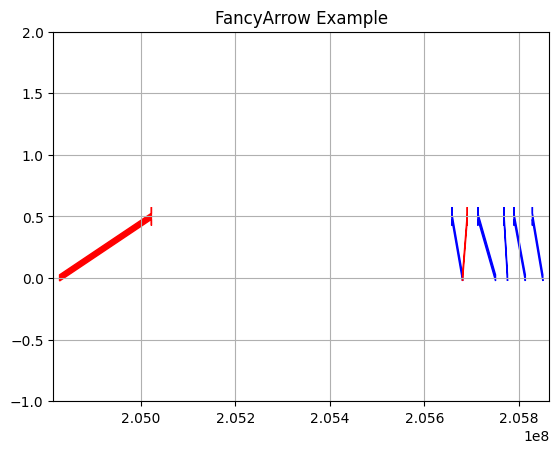

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Create a figure and axis
fig, ax = plt.subplots()

# Add a FancyArrow to the axis
for i in genes.index:
    symbol, strand=genes.loc[i,'gene'],genes.loc[i,'strand']
    start,end,length =genes.loc[i,'start'],genes.loc[i, 'end'],genes.loc[i, 'length']
    if strand =='+':
        arrow = FancyArrow(start, 0, length, 0.5, width=0.05, color='red')
        ax.add_patch(arrow)
    elif strand == '-':
        arrow = FancyArrow(end, 0, -length, 0.5, width=0.05, color='blue')
        ax.add_patch(arrow)
# Set the limits of the plot
ax.set_xlim(region)
ax.set_ylim(-1, 2)

# Add labels and show the plot
ax.set_title("FancyArrow Example")
plt.grid(True)
plt.show()

In [19]:
import requests
# Base API URL
server = "https://rest.ensembl.org"
ext = "/xrefs/symbol/homo_sapiens/"
headers = {"Content-Type": "application/json", "Accept": "application/json"}

# Specify the gene symbol
gene_symbol = "BRCA2"
url = f"{server}{ext}{gene_symbol}"

# Send GET request
response = requests.get(url, headers=headers)

# Process the response
if response.ok:
    xrefs = response.json()
    for entry in xrefs:
        if entry["type"] == "gene":
            print("Ensembl Gene ID:", entry["id"])
else:
    print(f"Error: {response.status_code}, {response.reason}")


Ensembl Gene ID: ENSG00000139618
Ensembl Gene ID: LRG_293


In [20]:
response.json()

[{'type': 'gene', 'id': 'ENSG00000139618'}, {'id': 'LRG_293', 'type': 'gene'}]

In [21]:
from ideal_genom.api_client import GeneEnsemblRestClient

gene_client = GeneEnsemblRestClient()

# Example list of IDs for the POST request
ids_gene = filtered['GENENAME'].unique().tolist()
ids_gene

for gene in ids_gene:

    gene_info = gene_client.get_gene_location(gene)

    if "error" in gene_info:
        print(f"Error: {gene_info['error']}")
    else:
        print("Gene Information:", gene_info)

KeyError: 'GENENAME'